In [16]:
import pandas as pd
import numpy as np
import requests
import json

In [17]:
url = "https://basketball-highlights-api.p.rapidapi.com/countries"

querystring = {"query":"Phone","page":"1","country":"US"}

headers = {
	"X-RapidAPI-Key": "SIGN-UP-FOR-KEY",
	"X-RapidAPI-Host": "real-time-amazon-data.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'message': 'You are not subscribed to this API.'}


In [18]:
df = pd.read_excel('Air_BNB.xlsx')

In [19]:
df.head(10)

id        room_type  accommodates  bathrooms cancellation_policy   
0   6901257  Entire home/apt           3.0        1.0              strict  \
1   6304928  Entire home/apt           7.0        1.0              strict   
2   7919400  Entire home/apt           5.0        1.0            moderate   
3  13418779  Entire home/apt           4.0        1.0            flexible   
4   3808709  Entire home/apt           2.0        1.0            moderate   
5  12422935     Private room           2.0        1.0              strict   
6  11825529  Entire home/apt           3.0        1.0            moderate   
7  13971273  Entire home/apt           2.0        1.0            moderate   
8    180792     Private room           2.0        1.0            moderate   
9   5385260     Private room           2.0        1.0            moderate   

   cleaning_fee instant_bookable  review_scores_rating  bedrooms  beds   
0           1.0                f                 100.0       1.0   1.0  \
1           1.0                t                  93.0       3.0   3.0   
2           1.0                t                  92.0       1.0   3.0   
3           1.0                f                   NaN       2.0   2.0   
4           1.0                t                  40.0       0.0   1.0   
5           1.0                t                 100.0       1.0   1.0   
6           1.0                t                  97.0       1.0   1.0   
7           1.0                f                  93.0       1.0   1.0   
8           1.0                f                  99.0       1.0   1.0   
9           1.0                t                  90.0       1.0   1.0   

   log_price  
0   5.010635  
1   5.129899  
2   4.976734  
3   6.620073  
4   4.744932  
5   4.442651  
6   4.418841  
7   4.787492  
8   4.787492  
9   3.583519

In [20]:
10**5.010635

102479.0285827062

In [21]:
print("No. of Rows :",df.shape[0])
print("No. of Columns :",df.shape[1])

No. of Rows : 74111
No. of Columns : 11


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  float64
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 6.2+ MB


In [23]:
round(df.drop('id',axis=1).describe(),2).T

count   mean   std   min    25%    50%     75%    max
accommodates          74108.0   3.16  2.15   1.0   2.00   2.00    4.00   16.0
bathrooms             73908.0   1.24  0.58   0.0   1.00   1.00    1.00    8.0
cleaning_fee          74107.0   0.73  0.44   0.0   0.00   1.00    1.00    1.0
review_scores_rating  57389.0  94.07  7.84  20.0  92.00  96.00  100.00  100.0
bedrooms              74019.0   1.27  0.85   0.0   1.00   1.00    1.00   10.0
beds                  73980.0   1.71  1.25   0.0   1.00   1.00    2.00   18.0
log_price             74111.0   4.78  0.72   0.0   4.32   4.71    5.22    7.6

In [24]:
df['cancellation_policy'].nunique()

3

In [25]:
df['cancellation_policy'].value_counts()

cancellation_policy
strict      32500
flexible    22543
moderate    19060
Name: count, dtype: int64

In [26]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),':', df['room_type'].nunique())
        print()
        print(df[column].value_counts())
        print()

ROOM_TYPE : 3

room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64

CANCELLATION_POLICY : 3

cancellation_policy
strict      32500
flexible    22543
moderate    19060
Name: count, dtype: int64

INSTANT_BOOKABLE : 3

instant_bookable
f    54660
t    19451
Name: count, dtype: int64



In [27]:
df.drop_duplicates()

id        room_type  accommodates  bathrooms cancellation_policy   
0       6901257  Entire home/apt           3.0        1.0              strict  \
1       6304928  Entire home/apt           7.0        1.0              strict   
2       7919400  Entire home/apt           5.0        1.0            moderate   
3      13418779  Entire home/apt           4.0        1.0            flexible   
4       3808709  Entire home/apt           2.0        1.0            moderate   
...         ...              ...           ...        ...                 ...   
74106  14549287     Private room           1.0        1.0            flexible   
74107  13281809  Entire home/apt           4.0        2.0            moderate   
74108  18688039  Entire home/apt           5.0        1.0            moderate   
74109  17045948  Entire home/apt           2.0        1.0              strict   
74110   3534845  Entire home/apt           4.0        1.0            moderate   

       cleaning_fee instant_bookable  review_scores_rating  bedrooms  beds   
0               1.0                f                 100.0       1.0   1.0  \
1               1.0                t                  93.0       3.0   3.0   
2               1.0                t                  92.0       1.0   3.0   
3               1.0                f                   NaN       2.0   2.0   
4               1.0                t                  40.0       0.0   1.0   
...             ...              ...                   ...       ...   ...   
74106           0.0                f                   NaN       1.0   1.0   
74107           1.0                f                  93.0       2.0   4.0   
74108           1.0                t                  94.0       2.0   2.0   
74109           1.0                t                   NaN       0.0   2.0   
74110           0.0                f                  96.0       1.0   2.0   

       log_price  
0       5.010635  
1       5.129899  
2       4.976734  
3       6.620073  
4       4.744932  
...          ...  
74106   4.605170  
74107   5.043425  
74108   5.220356  
74109   5.273000  
74110   4.852030  

[74111 rows x 11 columns]

In [28]:
df.drop('id',axis=1,inplace=True)

## Counting the Null Values

In [29]:
df.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [30]:
round(df.isnull().sum() * 100/df.shape[0],2)

room_type                0.01
accommodates             0.00
bathrooms                0.27
cancellation_policy      0.01
cleaning_fee             0.01
instant_bookable         0.00
review_scores_rating    22.56
bedrooms                 0.12
beds                     0.18
log_price                0.00
dtype: float64

In [31]:
df_mean = df.copy()

In [32]:
df_median = df.copy()
df_pred = df.copy()

## Mean Imputation

In [33]:
cat = []
num = []
for i in df_mean.columns:
    if df_mean[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)    

In [34]:
cat

['room_type', 'cancellation_policy', 'instant_bookable']

In [35]:
num

['accommodates',
 'bathrooms',
 'cleaning_fee',
 'review_scores_rating',
 'bedrooms',
 'beds',
 'log_price']

In [36]:
for column in df_mean.columns:
    if df_mean[column].dtype != 'object':
        mean = df_mean[column].mean()
        df_mean[column] = df_mean[column].fillna(mean)

In [37]:
df_mean.isnull().sum()

room_type               5
accommodates            0
bathrooms               0
cancellation_policy     8
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [38]:
for column in df_mean.columns:
    if df_mean[column].dtype == 'object':
        mode = df[column].mode()
        df_mean[column] = df_mean[column].fillna(mode)

In [42]:
df_mean.isnull().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [40]:
df_mean['room_type'] = df_mean['room_type'].fillna('Entire home/apt')

In [41]:
df_mean['cancellation_policy'] = df_mean['cancellation_policy'].fillna('strict')

## Median Imputation

In [43]:
for column in df_median.columns:
    if df_median[column].dtype != 'object':
        median = df_median[column].median()
        df_median[column] = df_median[column].fillna(median)

In [44]:
for column in df_median.columns:
    if df_median[column].dtype == 'object':
        mode = df_median[column].mode()[0]
        df_median[column] = df_median[column].fillna(mode)

In [45]:
df_median.isnull().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

## KNN Imputer

In [46]:
df_pred[cat].isnull().sum()

room_type              5
cancellation_policy    8
instant_bookable       0
dtype: int64

In [47]:
from sklearn.impute import KNNImputer

In [48]:
df_pred

room_type  accommodates  bathrooms cancellation_policy   
0      Entire home/apt           3.0        1.0              strict  \
1      Entire home/apt           7.0        1.0              strict   
2      Entire home/apt           5.0        1.0            moderate   
3      Entire home/apt           4.0        1.0            flexible   
4      Entire home/apt           2.0        1.0            moderate   
...                ...           ...        ...                 ...   
74106     Private room           1.0        1.0            flexible   
74107  Entire home/apt           4.0        2.0            moderate   
74108  Entire home/apt           5.0        1.0            moderate   
74109  Entire home/apt           2.0        1.0              strict   
74110  Entire home/apt           4.0        1.0            moderate   

       cleaning_fee instant_bookable  review_scores_rating  bedrooms  beds   
0               1.0                f                 100.0       1.0   1.0  \
1               1.0                t                  93.0       3.0   3.0   
2               1.0                t                  92.0       1.0   3.0   
3               1.0                f                   NaN       2.0   2.0   
4               1.0                t                  40.0       0.0   1.0   
...             ...              ...                   ...       ...   ...   
74106           0.0                f                   NaN       1.0   1.0   
74107           1.0                f                  93.0       2.0   4.0   
74108           1.0                t                  94.0       2.0   2.0   
74109           1.0                t                   NaN       0.0   2.0   
74110           0.0                f                  96.0       1.0   2.0   

       log_price  
0       5.010635  
1       5.129899  
2       4.976734  
3       6.620073  
4       4.744932  
...          ...  
74106   4.605170  
74107   5.043425  
74108   5.220356  
74109   5.273000  
74110   4.852030  

[74111 rows x 10 columns]

In [49]:
df_pred['room_type'] = df_pred['room_type'].fillna('Entire home/apt')

In [50]:
df_pred['cancellation_policy'] = df_pred['cancellation_policy'].fillna('strict')

In [51]:
df_pred[cat].isnull().sum()

room_type              0
cancellation_policy    0
instant_bookable       0
dtype: int64

In [52]:
for feature in df_pred.columns: 
    if df_pred[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_pred[feature].unique()))
        print(pd.Categorical(df_pred[feature].unique()).codes)
        df_pred[feature] = pd.Categorical(df_pred[feature]).codes



feature: room_type
['Entire home/apt', 'Private room', 'Shared room']
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']
[0 1 2]


feature: cancellation_policy
['strict', 'moderate', 'flexible']
Categories (3, object): ['flexible', 'moderate', 'strict']
[2 1 0]


feature: instant_bookable
['f', 't']
Categories (2, object): ['f', 't']
[0 1]


In [53]:
imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df_pred)
df_pred = pd.DataFrame(data = df_imputed,columns=df_pred.columns)

In [54]:
df_pred.isnull().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

# Exploratory Data Analytics

# Univariate Analysis

In [146]:
df_mean

room_type  accommodates  bathrooms cancellation_policy   
0      Entire home/apt           3.0        1.0              strict  \
1      Entire home/apt           7.0        1.0              strict   
2      Entire home/apt           5.0        1.0            moderate   
3      Entire home/apt           4.0        1.0            flexible   
4      Entire home/apt           2.0        1.0            moderate   
...                ...           ...        ...                 ...   
74106     Private room           1.0        1.0            flexible   
74107  Entire home/apt           4.0        2.0            moderate   
74108  Entire home/apt           5.0        1.0            moderate   
74109  Entire home/apt           2.0        1.0              strict   
74110  Entire home/apt           4.0        1.0            moderate   

       cleaning_fee instant_bookable  review_scores_rating  bedrooms  beds   
0               1.0                f            100.000000       1.0   1.0  \
1               1.0                t             93.000000       3.0   3.0   
2               1.0                t             92.000000       1.0   3.0   
3               1.0                f             94.067365       2.0   2.0   
4               1.0                t             40.000000       0.0   1.0   
...             ...              ...                   ...       ...   ...   
74106           0.0                f             94.067365       1.0   1.0   
74107           1.0                f             93.000000       2.0   4.0   
74108           1.0                t             94.000000       2.0   2.0   
74109           1.0                t             94.067365       0.0   2.0   
74110           0.0                f             96.000000       1.0   2.0   

       log_price  
0       5.010635  
1       5.129899  
2       4.976734  
3       6.620073  
4       4.744932  
...          ...  
74106   4.605170  
74107   5.043425  
74108   5.220356  
74109   5.273000  
74110   4.852030  

[74111 rows x 10 columns]

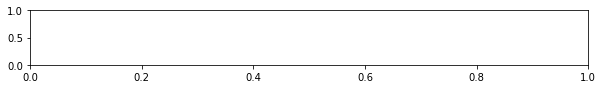

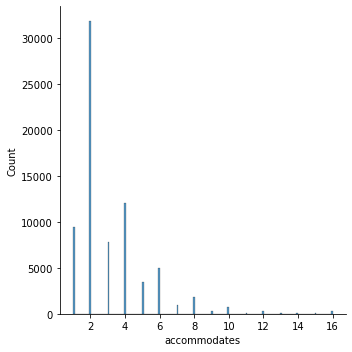

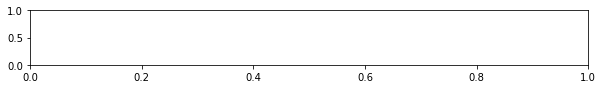

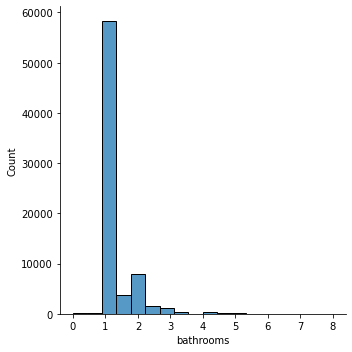

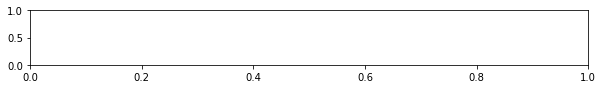

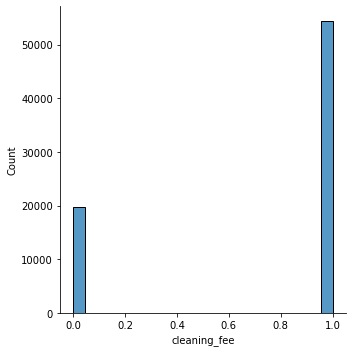

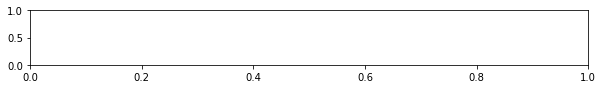

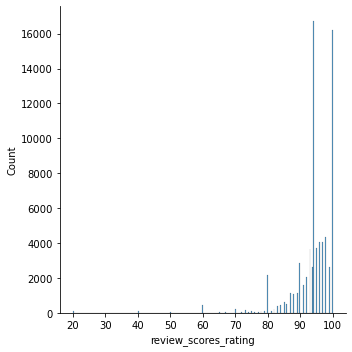

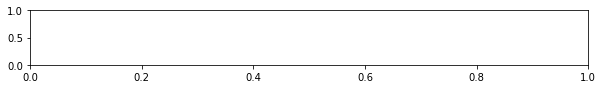

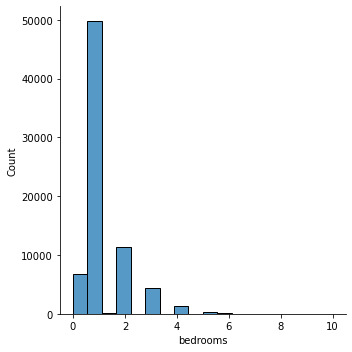

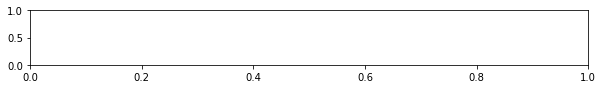

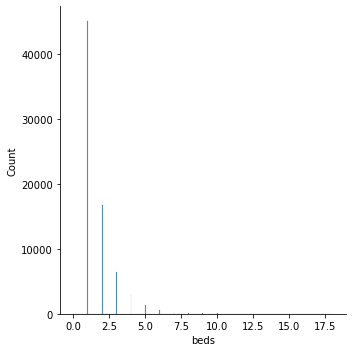

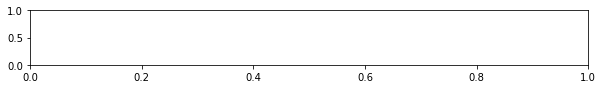

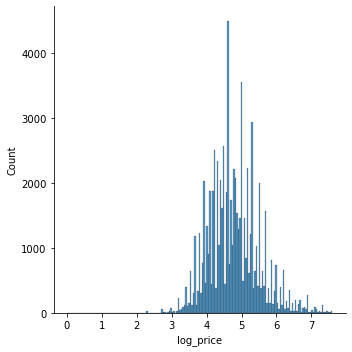

In [133]:
for i in num:
    fig,axs = plt.subplots(nrows=1,ncols=1, figsize=(10,1))
    sns.displot(df_mean[i])

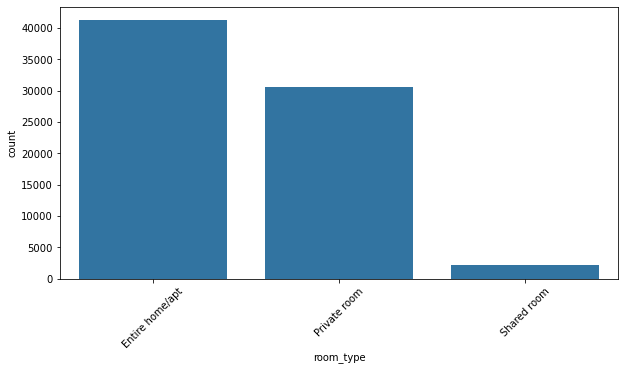

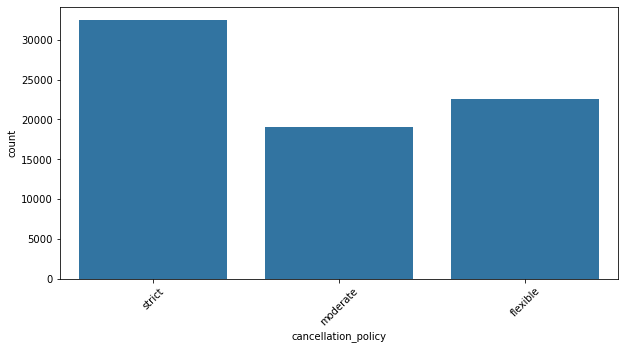

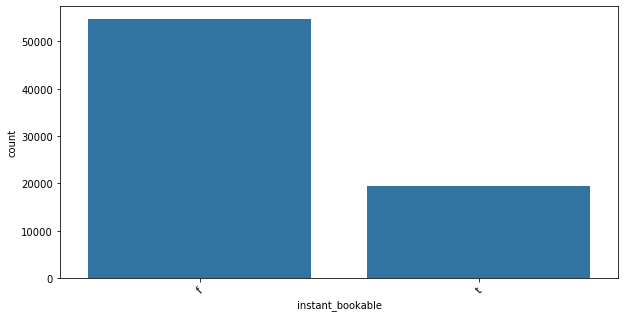

In [149]:
for i in df_mean[cat]:
    fig,axs = plt.subplots(nrows=1,ncols=1, figsize=(10,5))
    plt.xticks(rotation=45)
    sns.countplot(x=df_mean[i],data=df_mean[cat])    

## Bivariate Analysis

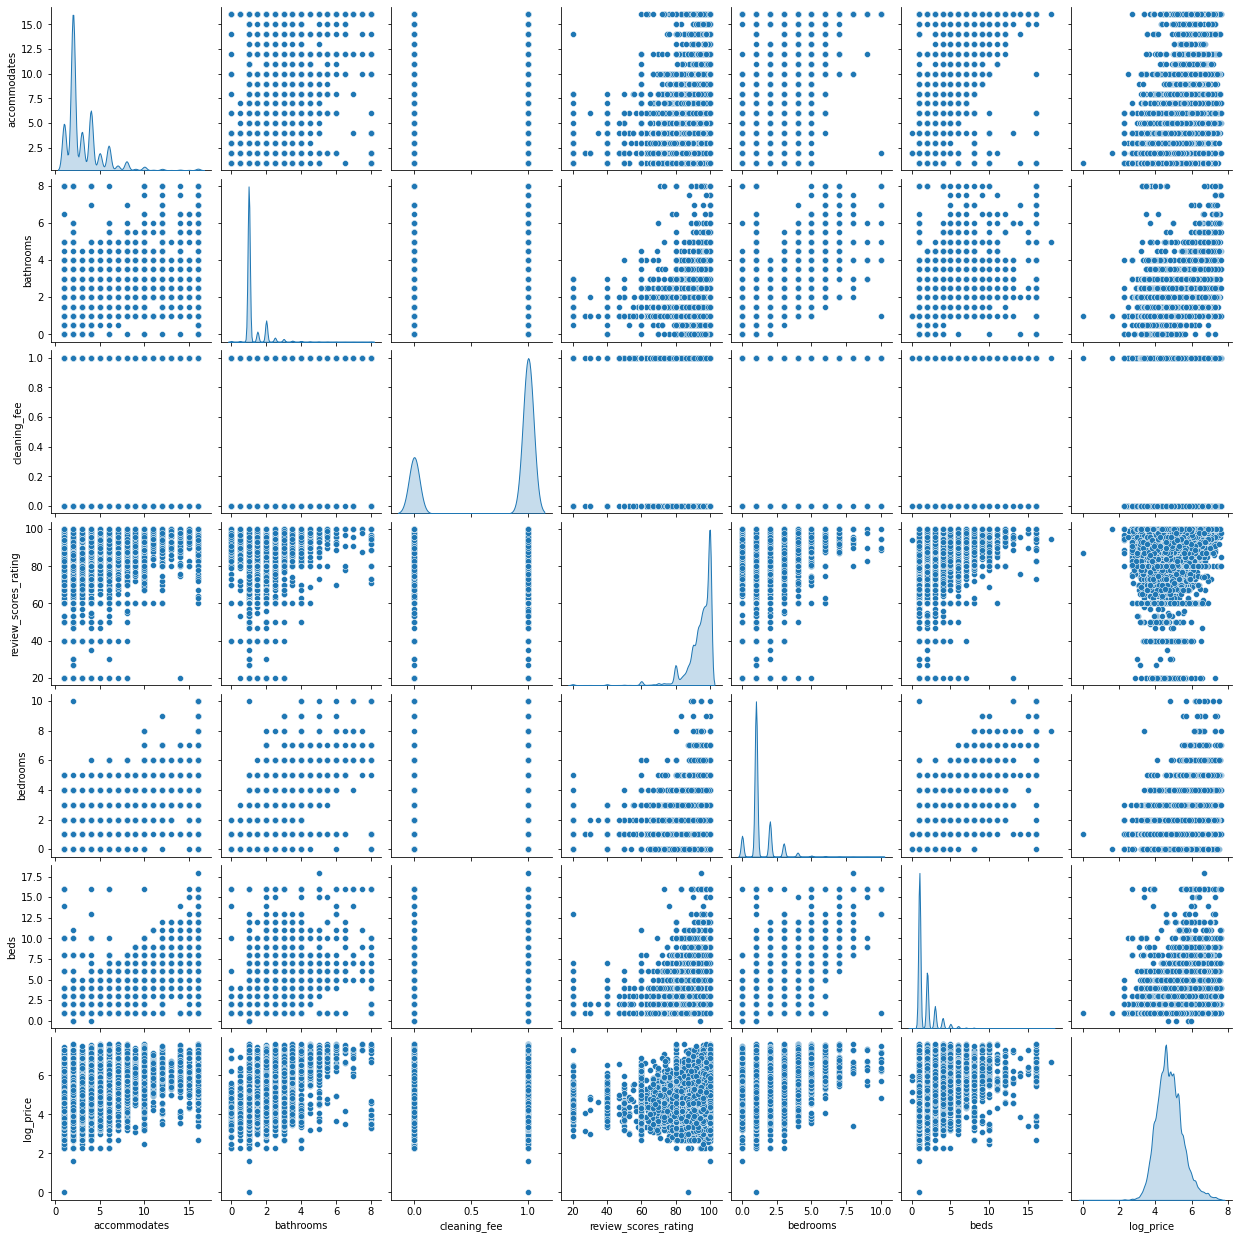

In [151]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

<AxesSubplot:>

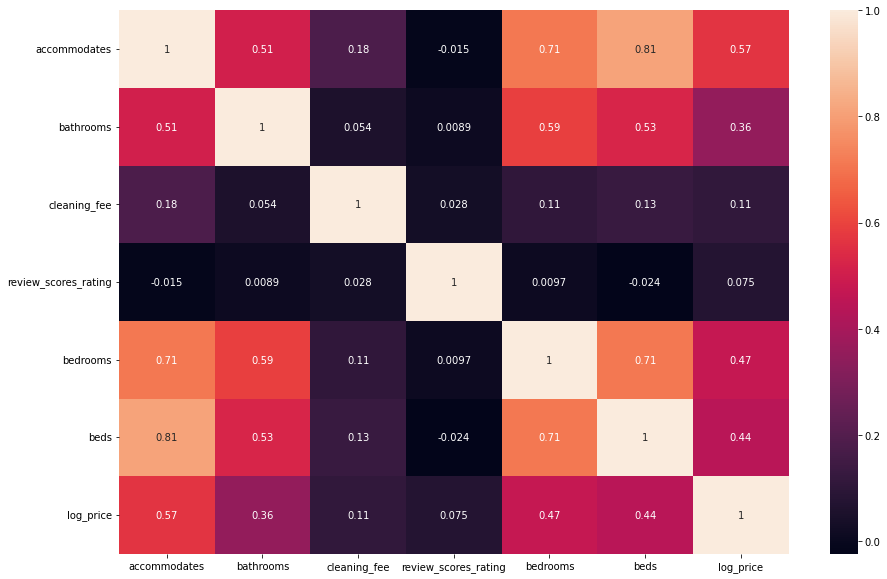

In [154]:
plt.figure(figsize=(15,10))
sns.heatmap(df_mean[num].corr(),annot=True)

## Treating Outliers

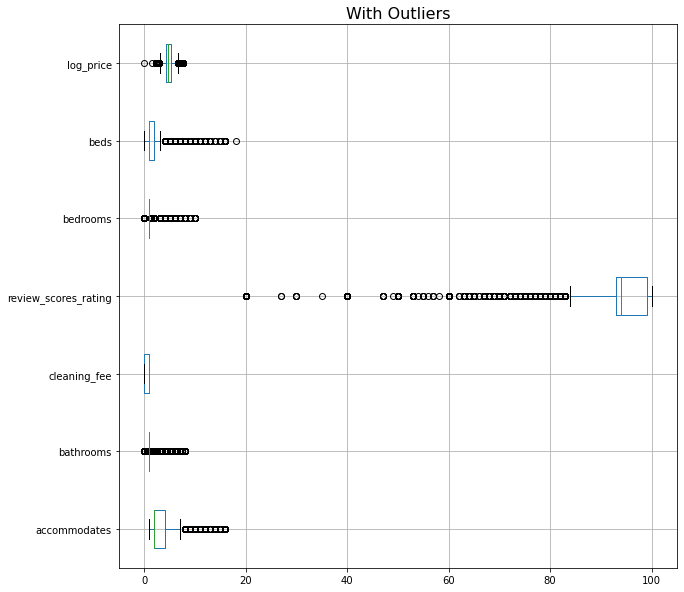

In [57]:
cont=df_mean.dtypes[(df_mean.dtypes!='uint8') & (df_mean.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_mean[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [63]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [59]:
for feature in df_mean.columns: 
    if df_mean[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_mean[feature].unique()))
        print(pd.Categorical(df_mean[feature].unique()).codes)
        df_mean[feature] = pd.Categorical(df_mean[feature]).codes



feature: room_type
['Entire home/apt', 'Private room', 'Shared room']
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']
[0 1 2]


feature: cancellation_policy
['strict', 'moderate', 'flexible']
Categories (3, object): ['flexible', 'moderate', 'strict']
[2 1 0]


feature: instant_bookable
['f', 't']
Categories (2, object): ['f', 't']
[0 1]


In [61]:
df_mean_wo = df_mean.copy()

In [64]:
for column in df_mean[cont].columns:
    lr,ur=remove_outlier(df_mean[column])
    df_mean[column]=np.where(df_mean[column]>ur,ur,df_mean[column])
    df_mean[column]=np.where(df_mean[column]<lr,lr,df_mean[column])

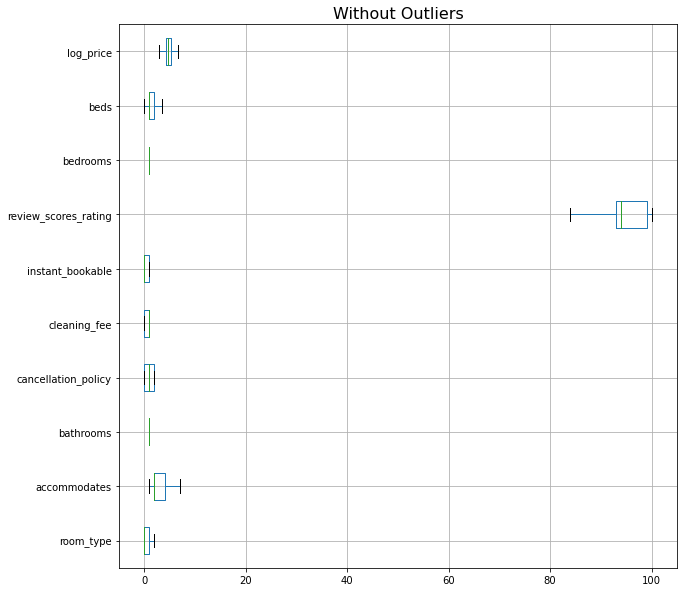

In [65]:
cont=df_mean.dtypes[(df_mean.dtypes!='uint8') & (df_mean.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_mean[cont].boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

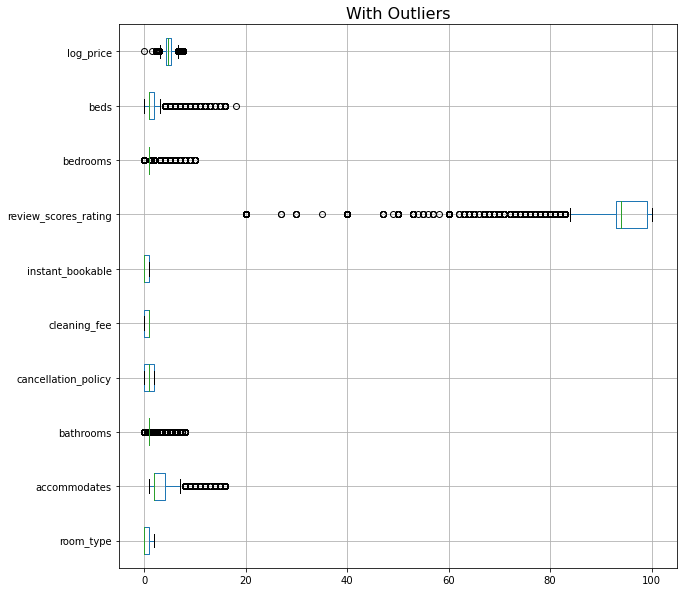

In [66]:
cont=df_mean_wo.dtypes[(df_mean_wo.dtypes!='uint8') & (df_mean_wo.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df_mean_wo[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

# Model Building

## Test Train Split

In [108]:
X = df_mean.drop('log_price', axis=1)
y = df_mean[['log_price']]

In [109]:
X.head()

room_type  accommodates  bathrooms  cancellation_policy  cleaning_fee   
0        0.0           3.0        1.0                  2.0           1.0  \
1        0.0           7.0        1.0                  2.0           1.0   
2        0.0           5.0        1.0                  1.0           1.0   
3        0.0           4.0        1.0                  0.0           1.0   
4        0.0           2.0        1.0                  1.0           1.0   

   instant_bookable  review_scores_rating  bedrooms  beds  
0               0.0            100.000000       1.0   1.0  
1               1.0             93.000000       1.0   3.0  
2               1.0             92.000000       1.0   3.0  
3               0.0             94.067365       1.0   2.0  
4               1.0             84.000000       1.0   1.0

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Linear Regression

In [83]:
LR_mean = LinearRegression()
LR_mean.fit(X_train, y_train)

LinearRegression()

In [84]:
from sklearn.linear_model import LinearRegression

In [93]:
LR_mean.coef_

array([[-5.35685669e-01,  1.42831941e-01, -1.69569220e-16,
        -1.50229100e-03, -8.47281164e-02, -7.51791979e-02,
         1.14266031e-02,  0.00000000e+00,  3.76261053e-02]])

In [94]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, LR_mean.coef_[0][idx]))

The coefficient for room_type is -0.5356856693142832
The coefficient for accommodates is 0.1428319410980402
The coefficient for bathrooms is -1.695692197767329e-16
The coefficient for cancellation_policy is -0.001502290996849391
The coefficient for cleaning_fee is -0.08472811640233478
The coefficient for instant_bookable is -0.07517919794966835
The coefficient for review_scores_rating is 0.011426603142369963
The coefficient for bedrooms is 0.0
The coefficient for beds is 0.03762610527202315


In [92]:
intercept = LR_mean.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.5379147071867463


In [91]:
LR_mean.score(X_train,y_train)

0.4949782817734526

In [90]:
LR_mean.score(X_test,y_test)

0.486846680125654

In [123]:
X = df_mean_wo.drop('log_price', axis=1)
y = df_mean_wo[['log_price']]

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [101]:
LR_mean_wo = LinearRegression()

In [105]:
LR_mean_wo.fit(X_train, y_train)

LinearRegression()

In [106]:
LR_mean_wo.score(X_train,y_train)

0.5119831327582172

In [107]:
LR_mean_wo.score(X_test,y_test)

0.5119831327582172

#### Lasso and Ridge Regression

In [112]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [114]:
lasso_mean = Lasso(alpha=0.1)
lasso_mean.fit(X_train,y_train)
print ("Lasso model:", (lasso_mean.coef_))

Lasso model: [-0.1561189   0.18268599  0.          0.         -0.         -0.
  0.00835849  0.          0.        ]


In [115]:
lasso_mean.score(X_train,y_train)

0.4177510206109879

In [116]:
lasso_mean.score(X_test,y_test)

0.41354486949695957

In [117]:
Ridge_mean = Ridge(alpha=1.0)
Ridge_mean.fit(X_train,y_train)

Ridge()

In [118]:
Ridge_mean.score(X_train,y_train)

0.49497828088885754

In [119]:
Ridge_mean.score(X_test,y_test)

0.48684717150829837

In [129]:
lasso_mean_wo = Lasso(alpha=0.1)
lasso_mean_wo.fit(X_train,y_train)
print ("Lasso model:", (lasso_mean_wo.coef_))

Lasso model: [-0.20261639  0.14379426  0.          0.         -0.         -0.
  0.0056322   0.          0.        ]


In [126]:
lasso_mean_wo.score(X_train,y_train)

0.41264735262194485

In [127]:
lasso_mean_wo.score(X_test,y_test)

0.4124133410595756

In [128]:
Ridge_mean_wo = Ridge()
Ridge_mean_wo.fit(X_train,y_train)
print ("Lasso model:", (Ridge_mean_wo.coef_))

Lasso model: [[-0.6130791   0.08030031  0.14894922 -0.00111262 -0.08040769 -0.05492932
   0.00567534  0.14863789 -0.0462427 ]]


In [130]:
Ridge_mean_wo.score(X_train,y_train)

0.5160664068549097

In [132]:
Ridge_mean_wo.score(X_test,y_test)

0.511983495560161